In [63]:
import pandas as pd
import numpy as np
import functions as func

In [64]:
df_train = pd.read_csv("../dataset/train_cleaned_outliers_imputed.csv")
df_train_id = df_train.pop("Id")
df_train_target = df_train.pop("CO2 Emissions(g/km)")

df_test = pd.read_csv("../dataset/test_cleaned_outliers_imputed.csv")
df_test_id = df_test.pop("Id")

In [65]:
df_train.info()

onehot_columns = ["Make", "Fuel Type", "Transmission_Type", "Vehicle Class General", "Gears", "is_outlier"]
binary_columns = ["Vehicle Class", "Transmission"]
ordinal_columns = ["Vehicle Type"]

numerical_columns = df_train.select_dtypes(include='float64').columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          54937 non-null  object 
 2   Engine Size(L)         54937 non-null  float64
 3   Cylinders              54937 non-null  float64
 4   Transmission           54937 non-null  object 
 5   Fuel Type              54937 non-null  object 
 6   Fuel Consumption City  54937 non-null  float64
 7   Fuel Consumption Hwy   54937 non-null  float64
 8   Fuel Consumption Comb  54937 non-null  float64
 9   Transmission_Type      54937 non-null  object 
 10  Gears                  54937 non-null  int64  
 11  Vehicle Class General  54937 non-null  object 
 12  Vehicle Type           54937 non-null  object 
 13  is_outlier             54937 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 5.9+ 

# create dataset ver 2 (select feature from correlation)

c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


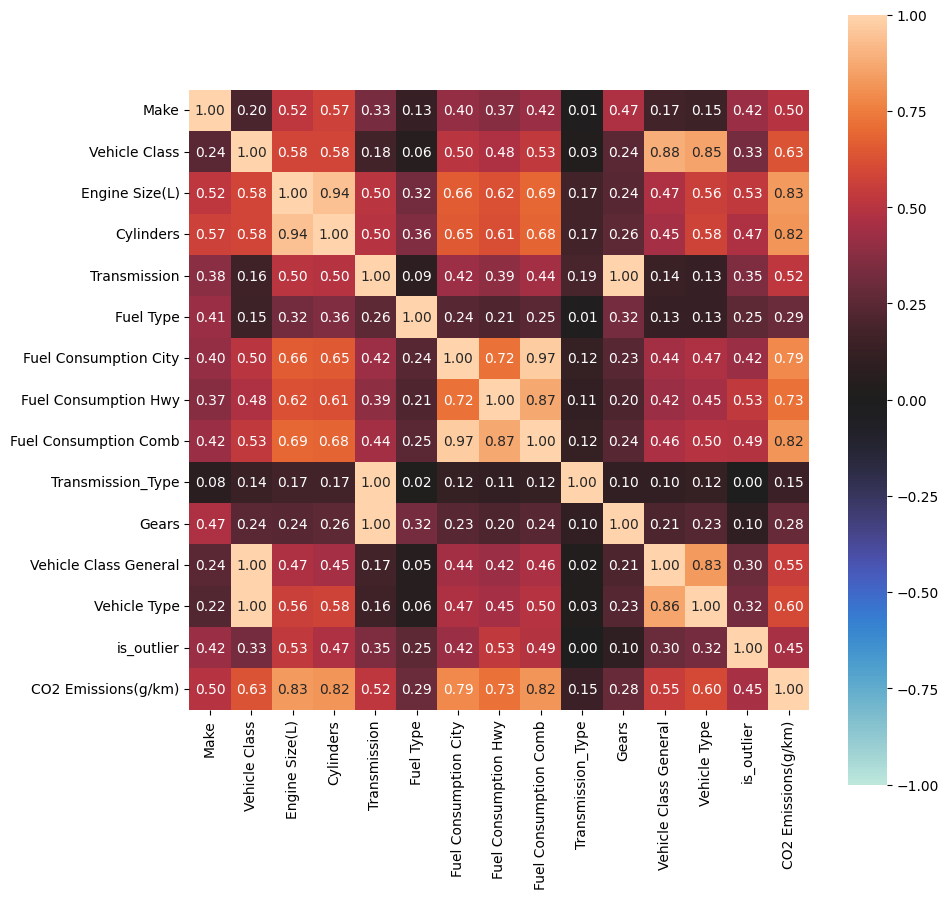

In [66]:
from dython.nominal import associations

df_temp_train = pd.concat([df_train, df_train_target], axis=1)

associations(
    df_temp_train,
    nom_nom_assoc="theil",
    plot=True,
    nan_strategy="drop_samples",
    # clustering=True,
    figsize=(10, 10),
)
print()

columns_to_drop = ["Fuel Type", "Transmission_Type", "Gears"]

onehot_columns_2 = [
    "Make",
    "Vehicle Class General",
    "is_outlier",
]
binary_columns_2 = ["Vehicle Class", "Transmission"]
ordinal_columns_2 = ["Vehicle Type"]

numerical_columns_2 = df_train.select_dtypes(include="float64").columns.tolist()

In [67]:
df_train_2 = df_train.drop(columns_to_drop, axis=1)
df_test_2 = df_test.drop(columns_to_drop, axis=1)

# create dataset ver 3 (proper imputation Engine Size and Cylinders) -> train first with non existing nan values and then impute, (use same column)

# create dataset ver 4 (choose only high correlated data)

In [68]:
selected_features = [
    "Engine Size(L)",
    "Cylinders",
    "Fuel Consumption City",
    "Fuel Consumption Hwy",
    "Fuel Consumption Comb",
]

onehot_columns_4 = []
binary_columns_4 = []
ordinal_columns_4 = []

numerical_columns_4 = df_train.select_dtypes(include="float64").columns.tolist()

In [69]:
df_train_4 = df_train[selected_features].copy()
df_test_4 = df_test[selected_features].copy()

# create dataset ver 5 (feature reduction using pca and mca)

# create dataset ver 5 (drop extreme outliers IQR with multiplier 2.5 same immputation pipeline)

# create dataset ver 6 (drop extreme outliers with multiplier 2.5 different imputation pipeline)

In [70]:
# from dython.nominal import associations
# import matplotlib.pyplot as plt


# df_temp_train, df_temp_test = func.encode_categorical_features(
#     df_train, df_test, onehot_columns, binary_columns, ordinal_columns
# )
# df_temp_train, df_temp_test = func.minmax_transform_dataframe(
#     df_temp_train, df_temp_test, numerical_columns
# )

# df_temp_train = pd.concat([df_temp_train, df_train_target], axis=1)

# # Compute the associations
# assoc = associations(
#     df_temp_train,
#     nominal_columns="CO2 Emissions(g/km)",
#     plot=False,
#     nom_nom_assoc="theil",
# )

# # Get the correlation of 'CO2 Emission(g/km)' with all other features
# correlation = assoc["corr"]["CO2 Emissions(g/km)"]

# # Convert the correlation Series to a DataFrame
# correlation_df = correlation.to_frame()

# # Reset the index of the DataFrame
# correlation_df.reset_index(inplace=True)

# # Rename the columns
# correlation_df.columns = ["Feature", "Correlation"]

# # Sort the DataFrame by the absolute value of the correlation
# correlation_df["AbsCorrelation"] = correlation_df["Correlation"].abs()
# correlation_df.sort_values(by="AbsCorrelation", ascending=False, inplace=True)

# # Plot the correlation
# plt.figure(figsize=(15, 15))
# plt.barh(
#     y=correlation_df["Feature"], width=correlation_df["Correlation"], color="skyblue"
# )
# plt.xlabel("Correlation")
# plt.title("Correlation with CO2 Emissions(g/km)")
# plt.show()

In [71]:
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D
import tensorflow as tf
from sklearn.svm import SVR


random_state = 42
# tf.random.set_seed(random_state)


# def create_model():
#     n_features = 66

#     model = Sequential()
#     model.add(Dense(64, activation="relu", input_shape=(n_features,)))
#     model.add(Dropout(0.5))
#     model.add(Dense(50, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(1))

#     model.compile(optimizer="adam", loss="mse")
#     return model


model_lgbm = lgb.LGBMRegressor(random_state=random_state)
model_xgb = XGBRegressor(random_state=random_state)
# nn_model = KerasRegressor(model=create_model, epochs=100, verbose=0)
# model_rf = RandomForestRegressor(random_state=random_state)
model_bag_xgb = BaggingRegressor(
    estimator=model_xgb, random_state=random_state,
)
model_bag_lgbm = BaggingRegressor(
    estimator=model_lgbm, random_state=random_state,
)
# model_svr = SVR()


model_ensemble = StackingRegressor(
    estimators=[
        ("xgb", model_xgb),
        ("lgbm", model_lgbm),
        # ("nn", nn_model),
        # ("svr", model_svr),
        # ("rf", model_rf),
    ],
)

model_ensemble_2 = StackingRegressor(
    estimators=[
        ("bag_xgb", model_bag_xgb),
        ("bag_lgbm", model_bag_lgbm),
        # ("nn", nn_model),
        # ("svr", model_svr),
        # ("rf", model_rf),
    ],
)

In [72]:
import time

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

# Assuming 'models' is a list of your models
models = [
    # model_xgb,
    # model_lgbm,
    # model_rf,
    # model_svr,
    model_bag_xgb,
    model_bag_lgbm,
    # model_ensemble,
    model_ensemble_2,
]

# Create a list of your datasets
datasets = [
    df_train,
    df_train_4
    # df_train_2,
]

datasets_columns = [
    {"onehot":onehot_columns, "binary":binary_columns, "ordinal":ordinal_columns, "numerical":numerical_columns},
    # {"onehot":onehot_columns_2, "binary":binary_columns_2, "ordinal":ordinal_columns_2, "numerical":numerical_columns_2},
    {"onehot":onehot_columns_4, "binary":binary_columns_4, "ordinal":ordinal_columns_4, "numerical":numerical_columns_4},
]

y = df_train_target

# Initialize a dictionary to hold your results
results = {}

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Define your preprocessing steps
preprocessing_steps = [
    {"name": "minmax_transform_dataframe", "func": func.minmax_transform_dataframe},
    {"name": "standard_scale_dataframe", "func": func.standard_scale_dataframe},
    # {"name": "power_transform_dataframe", "func": func.power_transform_dataframe},
]

# Loop over your models
# Loop over your models
for i, model in enumerate(models):
    model_name = type(model).__name__ + f"{i+1}"
    results[model_name] = {}

    # Loop over your datasets
    for i, (dataset, dataset_columns) in enumerate(zip(datasets, datasets_columns)):
        results[model_name][f"dataset_{i+1}"] = {
            "rmse": [],
            "training_time": [],
        }

        # Extract columns for this dataset
        onehot_columns = dataset_columns["onehot"]
        binary_columns = dataset_columns["binary"]
        ordinal_columns = dataset_columns["ordinal"]
        numerical_columns = dataset_columns["numerical"]

        # Perform cross-validation
        for train_index, test_index in kf.split(dataset):
            X_train, X_test = dataset.iloc[train_index], dataset.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Preprocess the data
            X_train, X_test = func.encode_categorical_features(
                X_train,
                X_test,
                onehot_columns,
                binary_columns,
                ordinal_columns,
            )

            # Apply each preprocessing step
            for step in preprocessing_steps:
                preprocessing_func = step["func"]

                X_train, X_test = preprocessing_func(X_train, X_test, numerical_columns)

                # Start the timer
                start_time = time.time()

                # Train the model
                model.fit(X_train, y_train)

                # End the timer
                end_time = time.time()

                # Calculate the training time
                training_time = end_time - start_time

                # Make predictions
                predictions = model.predict(X_test)

                # Evaluate the model
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)

                # Store the results
                if step["name"] not in results[model_name][f"dataset_{i+1}"]:
                    results[model_name][f"dataset_{i+1}"][step["name"]] = {
                        "rmse": [],
                        "training_time": [],
                    }

                results[model_name][f"dataset_{i+1}"][step["name"]]["rmse"].append(rmse)
                results[model_name][f"dataset_{i+1}"][step["name"]][
                    "training_time"
                ].append(training_time)

        # Calculate the mean RMSE and training time for each preprocessing step
        for step in preprocessing_steps:
            results[model_name][f"dataset_{i+1}"][step["name"]]["rmse"] = np.mean(
                results[model_name][f"dataset_{i+1}"][step["name"]]["rmse"]
            )
            results[model_name][f"dataset_{i+1}"][step["name"]][
                "training_time"
            ] = np.mean(
                results[model_name][f"dataset_{i+1}"][step["name"]]["training_time"]
            )

            # Print the process
            print(
                f"Model: {model_name}, Dataset: {i+1}, Preprocessing: {step['name']}, Mean RMSE: {results[model_name][f'dataset_{i+1}'][step['name']]['rmse']:.4f}, Mean Training time: {results[model_name][f'dataset_{i+1}'][step['name']]['training_time']:.4f} seconds"
            )

Model: BaggingRegressor1, Dataset: 1, Preprocessing: minmax_transform_dataframe, Mean RMSE: 19.5872, Mean Training time: 6.4457 seconds
Model: BaggingRegressor1, Dataset: 1, Preprocessing: standard_scale_dataframe, Mean RMSE: 19.5872, Mean Training time: 6.7937 seconds
Model: BaggingRegressor1, Dataset: 2, Preprocessing: minmax_transform_dataframe, Mean RMSE: 27.4821, Mean Training time: 4.6034 seconds
Model: BaggingRegressor1, Dataset: 2, Preprocessing: standard_scale_dataframe, Mean RMSE: 27.4821, Mean Training time: 4.2732 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 43949, number of used features: 65
[LightGBM] [Info] Start training from score 247.769369
[LightGBM] [Info] Auto-choosing row-wise multi-thread

In [ ]:
data = []
for model, datasets in results.items():
    for dataset, metrics in datasets.items():
        for transformation, values in metrics.items():
            if isinstance(values, dict):
                row = [model, dataset, transformation]
                row.append(values.get("rmse"))
                row.append(values.get("training_time"))
                data.append(row)

df_results = pd.DataFrame(
    data, columns=["Model", "Dataset", "Transformation", "RMSE", "Training Time"]
)

df_sorted = df_results.sort_values(by="RMSE", ascending=True)

df_sorted.to_csv('results_to_submit_4.csv', index=False)

df_sorted

,Model,Dataset,Transformation,RMSE,Training Time
21,StackingRegressor6,dataset_1,standard_scale_dataframe,19.564298,65.202926
20,StackingRegressor6,dataset_1,minmax_transform_dataframe,19.564987,63.611770
8,BaggingRegressor3,dataset_1,minmax_transform_dataframe,19.587175,7.607968
9,BaggingRegressor3,dataset_1,standard_scale_dataframe,19.587175,7.890618
17,StackingRegressor5,dataset_1,standard_scale_dataframe,19.743886,7.099598
16,StackingRegressor5,dataset_1,minmax_transform_dataframe,19.744393,7.728864
0,XGBRegressor1,dataset_1,minmax_transform_dataframe,19.812993,0.961260
1,XGBRegressor1,dataset_1,standard_scale_dataframe,19.812993,0.846229
5,LGBMRegressor2,dataset_1,standard_scale_dataframe,20.331398,0.742114
4,LGBMRegressor2,dataset_1,minmax_transform_dataframe,20.339575,0.783299


# Use Test

In [ ]:
# import time
# import numpy as np

# # Assuming 'models' is a list of your models
# models = [model_xgb, model_lgbm, model_rf, model_ensemble]

# # Create a list of your train datasets
# train_datasets = [df_train]

# # Create a list of your test datasets
# test_datasets = [df_test]

# y = df_train_target

# # Initialize a dictionary to hold your results
# results = {}

# # Loop over your models
# for model in models:
#     model_name = type(model).__name__
#     results[model_name] = {}

#     # Loop over your datasets
#     for i, (train_dataset, test_dataset) in enumerate(
#         zip(train_datasets, test_datasets)
#     ):
#         results[model_name][f"dataset_{i+1}"] = {
#             "predictions": [],
#             "training_time": [],
#         }

#         X_train = train_dataset
#         y_train = y

#         X_test = test_dataset

#         X_train, X_test = func.encode_categorical_features(
#             X_train,
#             X_test,
#             onehot_columns,
#             binary_columns,
#             ordinal_columns,
#         )

#         # X_train, X_test = func.minmax_transform_dataframe(X_train, X_test, numerical_columns)
#         # X_train, X_test = func.minmax_transform_dataframe(X_train, X_test, numerical_columns)
#         X_train, X_test = func.minmax_transform_dataframe(X_train, X_test, numerical_columns)

#         # Start the timer
#         start_time = time.time()

#         # Train the model
#         model.fit(X_train, y_train)

#         # End the timer
#         end_time = time.time()

#         # Calculate the training time
#         training_time = end_time - start_time

#         # Make predictions
#         predictions = model.predict(X_test)

#         # Store the results
#         results[model_name][f"dataset_{i+1}"]["predictions"] = predictions
#         results[model_name][f"dataset_{i+1}"]["training_time"] = training_time

#         # Print the process
#         print(
#             f"Model: {model_name}, Dataset: {i+1}, Training time: {results[model_name][f'dataset_{i+1}']['training_time']:.4f} seconds"
#         )

Model: XGBRegressor, Dataset: 1, Training time: 0.7570 seconds
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 54937, number of used features: 65
[LightGBM] [Info] Start training from score 246.688680
Model: LGBMRegressor, Dataset: 1, Training time: 0.3690 seconds
Model: KerasRegressor, Dataset: 1, Training time: 250.7236 seconds
Model: RandomForestRegressor, Dataset: 1, Training time: 70.5704 seconds
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

In [ ]:
# flat_results = []
# for model_name, datasets in results.items():
#     for dataset_name, metrics in datasets.items():
#         flat_results.append(
#             {
#                 "model_name": model_name,
#                 "dataset_name": dataset_name,
#                 "predictions": metrics["predictions"],
#                 "sum_predictions": np.sum(metrics["predictions"]),
#                 "training_time": metrics["training_time"],
#             }
#         )

# # Convert the flattened results to a DataFrame
# df_results_submit = pd.DataFrame(flat_results)
# df_results_submit

,model_name,dataset_name,predictions,sum_predictions,training_time
0,XGBRegressor,dataset_1,"[340.5571, 198.10645, 210.54256, 226.43877, 22...",5.798222e+06,0.756993
1,LGBMRegressor,dataset_1,"[342.9385418176665, 196.41416644463698, 206.71...",5.798744e+06,0.368998
2,KerasRegressor,dataset_1,"[349.37357, 197.83528, 209.56097, 228.90633, 2...",5.803478e+06,250.723649
3,RandomForestRegressor,dataset_1,"[336.28, 199.98, 216.34, 223.65, 231.76, 226.0...",5.800611e+06,70.570397
4,StackingRegressor,dataset_1,"[339.995538127734, 198.48505342341005, 212.171...",5.801221e+06,1619.272263


In [ ]:
# stacking_regressor_predictions = results["StackingRegressor"]["dataset_1"][
#     "predictions"
# ]
# stacking_regressor_predictions

array([339.99553813, 198.48505342, 212.17146274, ..., 236.29215506,
       227.44398726, 336.39483324])

In [ ]:
# df_sample_submission = pd.read_csv("../dataset/sample_submission.csv")
# df_sample_submission["CO2 Emissions(g/km)"] = stacking_regressor_predictions
# df_sample_submission

,Id,CO2 Emissions(g/km)
0,54938,339.995538
1,54939,198.485053
2,54940,212.171463
3,54941,226.693205
4,54942,227.542101
...,...,...
23540,78478,210.309957
23541,78479,169.465515
23542,78480,236.292155
23543,78481,227.443987


In [ ]:
# df_sample_submission.to_csv("../submit/submission_stacking_regressor_2.csv", index=False)